#       __Green Skills AI Workshop Final Project__
- Aditya Joshi        22070521016
- Anvesh Khode        22070521021

In [1]:
import pandas as pd

In [2]:
file_path =  './sdgDataset.xlsx'

data = pd.ExcelFile(file_path)
data.sheet_names


['Note on Sources',
 'UN reporting',
 'UN reporting source note',
 'ea_total_rate_deficit',
 'ea_urban_rate_deficit',
 'ea_rural_rate_deficit']

In [3]:
# UN Reporting Sheet Analysis
un_reporting_data = data.parse('UN reporting')


In [4]:
# Feature Selection
cleaned_data = un_reporting_data.drop(columns=[ 'Reporting Type', 'SeriesCode', 'SeriesID', 'Indicator', 'Units', 'GeoAreaName/Reference Area Name', 'GeoAreaName/Reference Area Name', 'Ref_Area_Type', 'SeriesName', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'FootNote', 'ISOalpha3', 'Source'])
cleaned_data.columns = cleaned_data.columns.str.strip()
cleaned_data = cleaned_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

cleaned_data.head()

C:\Users\Anvesh\AppData\Local\Temp\ipykernel_15840\3275182752.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_data = cleaned_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


In [5]:
cleaned_data.isnull().sum()

GeoAreaCode/Reference Area Code      0
TimePeriod                           0
Value                                0
Nature                             562
Location                             0
Type                                 0
dtype: int64

In [6]:
# Filling Missing Values

# Nature column, replace NA values with its own label
cleaned_data['Nature'].fillna('NA', inplace = True)
cleaned_data['Nature'].replace('NA ', 'NA', inplace = True)

# Replace 'NaN' values with median
cleaned_data['Value'].replace('NaN', cleaned_data['Value'].median())

cleaned_data.head()

C:\Users\Anvesh\AppData\Local\Temp\ipykernel_15840\2037605223.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['Nature'].fillna('NA', inplace = True)


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


In [7]:
print(cleaned_data.isnull().sum())

index = 0
for row in cleaned_data['Nature']:
    if row == 'NA':
        index = index+1

print(f"Nature elements which are 'NA': ", index)
print("Dropping rows...")
cleaned_data = cleaned_data[cleaned_data['Nature'] != 'NA']
print(f"Nature elements which are 'NA': ", sum(cleaned_data['Nature'] == 'NA'))


GeoAreaCode/Reference Area Code    0
TimePeriod                         0
Value                              0
Nature                             0
Location                           0
Type                               0
dtype: int64
Nature elements which are 'NA':  563
Dropping rows...
Nature elements which are 'NA':  0


In [8]:
print("Number of unique entries in: \n")
for field in cleaned_data:
    var = cleaned_data[field].unique()
    if var.dtype == str:
        print(var)
    var = len(var)
    print(f"{field} : {var}")

Number of unique entries in: 

GeoAreaCode/Reference Area Code : 320
TimePeriod : 23
Value : 1163
Nature : 4
Location : 3
Type : 2


In [9]:
# Label Encode the Data

from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Location', 'Type', 'Nature', 'TimePeriod']
label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    label_encoders[col] = le

cleaned_data.head()


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,0,37.7,1,0,1
1,98106,1,38,1,0,1
2,98106,2,39,1,0,1
3,98106,3,40.9,1,0,1
4,98106,4,40.7,1,0,1


C:\Users\Anvesh\AppData\Local\Temp\ipykernel_15840\3929017378.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


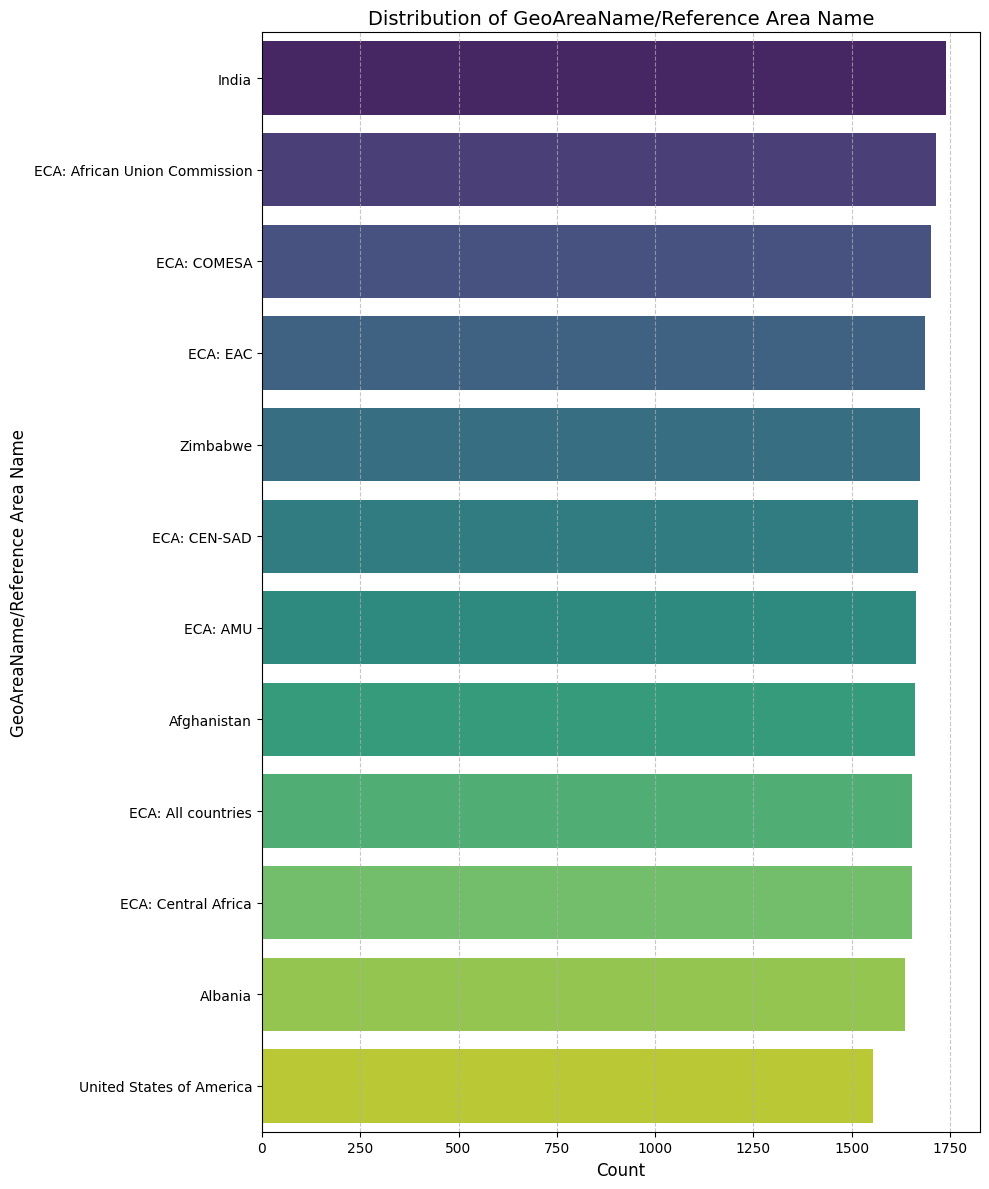

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
categories = np.array(['ECA: African Union Commission', 'ECA: All countries', 
                       'ECA: AMU', 'ECA: CEN-SAD', 'ECA: Central Africa', 'ECA: COMESA',
                       'ECA: EAC', 'Afghanistan', 'Albania', 'India', 'United States of America', 
                       'Zimbabwe'])  # Use a subset of categories for clarity
n_data_points = 20000
geo_area_names = np.random.choice(categories, n_data_points)
graph_data = pd.DataFrame({'GeoAreaName/Reference Area Name': geo_area_names})

# Count the occurrences of each category
counts = graph_data['GeoAreaName/Reference Area Name'].value_counts()

# Sort by counts for better visualization
counts = counts.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 12))
sns.barplot(
    x=counts.values,
    y=counts.index,
    palette='viridis'
)

# Add labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('GeoAreaName/Reference Area Name', fontsize=12)
plt.title('Distribution of GeoAreaName/Reference Area Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


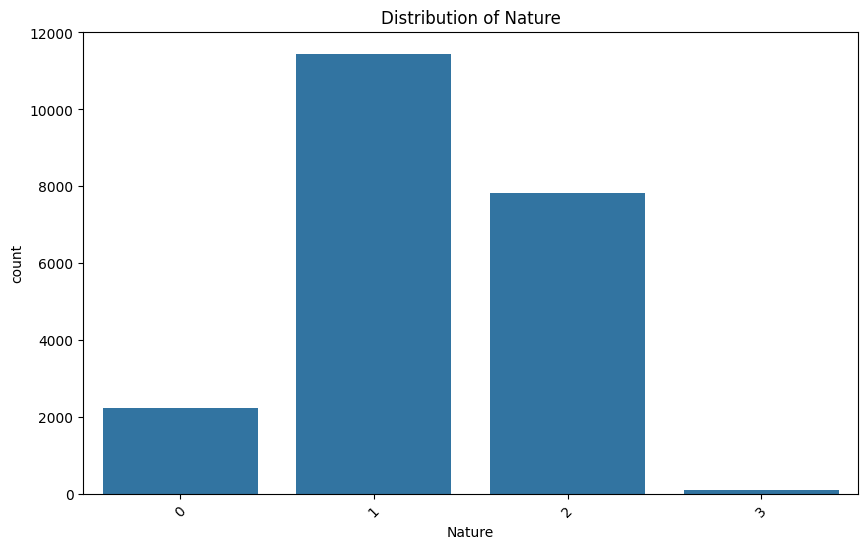

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Nature')
plt.title('Distribution of Nature')
plt.xticks(rotation=45)
plt.show()


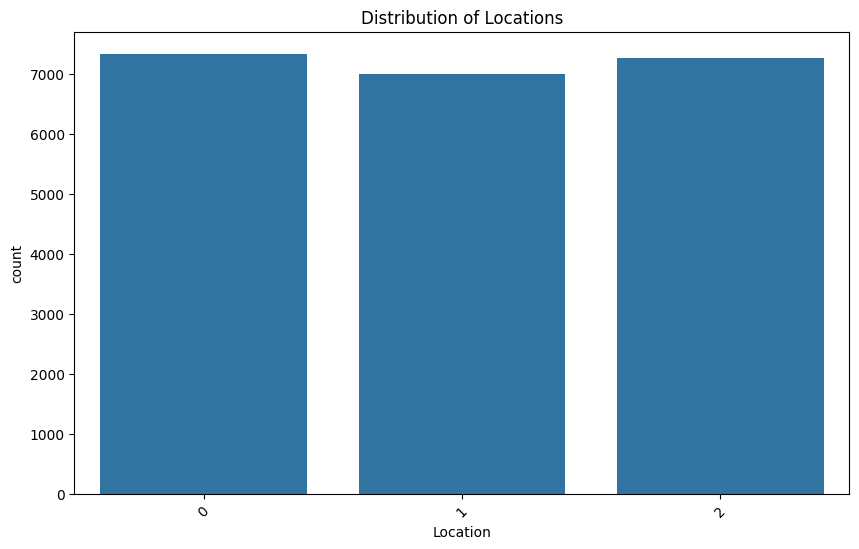

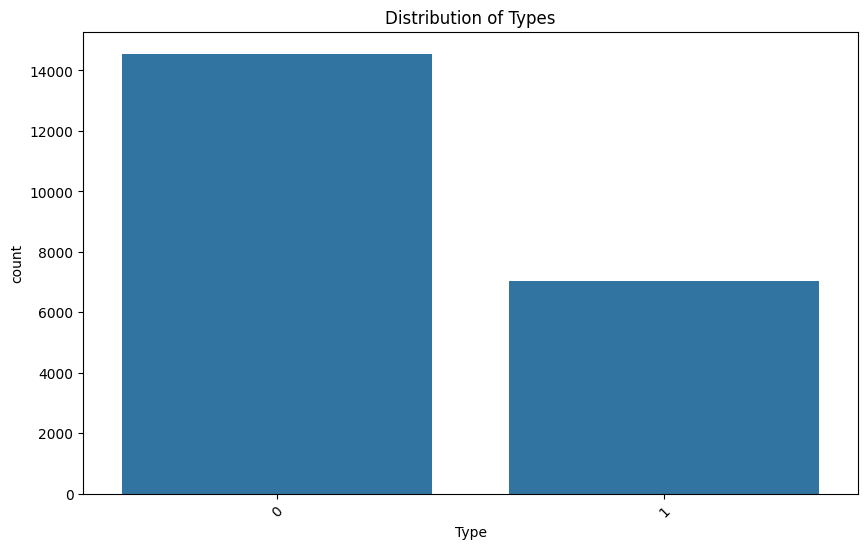

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Location')
plt.title('Distribution of Locations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Type')
plt.title('Distribution of Types')
plt.xticks(rotation=45)
plt.show()


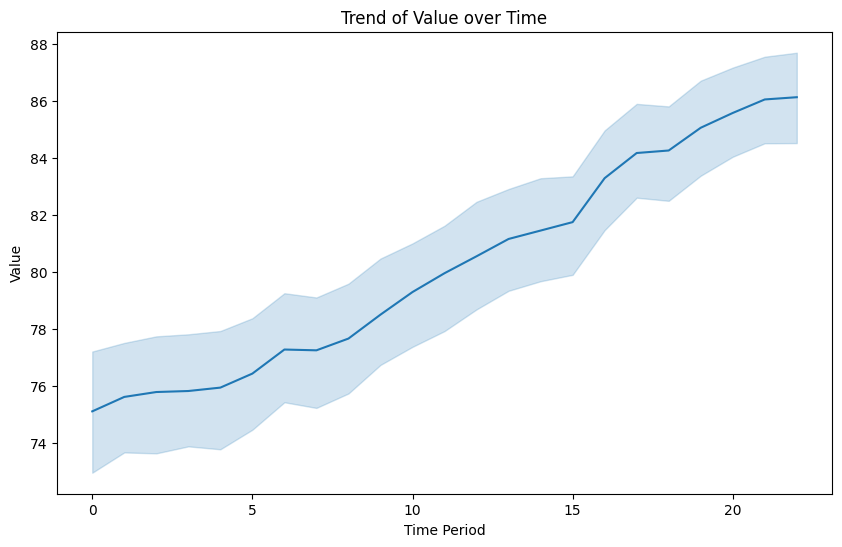

In [13]:
# Assuming TimePeriod is numeric or can be converted to a time format
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='TimePeriod', y='Value')
plt.title('Trend of Value over Time')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.show()